In [12]:
# Import Keras Packages
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Initializing CNN Layers
model = Sequential()

In [3]:
# First Convolution
# 64 Filters which are 3x3
# Input image sizes are formatted 150x150 and 3 channels (Red, Blue, Green)
# Using ReLU for our activation function
model.add(Conv2D(64, kernel_size=(3, 3), input_shape = (150, 150, 3), activation = 'relu'))

Instructions for updating:
Colocations handled automatically by placer.


In [4]:
# Max Pooling Layer 2x2
model.add(MaxPooling2D(pool_size = (2, 2)))

In [5]:
# Second Convolution
# 32 Filters which are 3x3
# Input image sizes are formatted 150x150 and 3 channels (Red, Blue, Green)
# Using ReLU for our activation function
#model.add(Conv2D(32, kernel_size=(3, 3), input_shape = (150, 150, 3), activation = 'relu'))
model.add(Conv2D(32, kernel_size=(3, 3), activation = 'relu'))

In [6]:
# Max Pooling Layer 2x2
model.add(MaxPooling2D(pool_size = (2, 2)))

In [7]:
model.add(Flatten())

In [8]:
# Fully Connecting Layer
model.add(Dense(128, activation = 'relu'))

# Return a categorical outcome
model.add(Dense(3, activation = 'softmax'))

In [9]:
# Compile the CNN
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [10]:
# Fitting the CNN to the images
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('dataset/seg_train',
                                                 target_size = (150, 150),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('dataset/seg_test',
                                            target_size = (150, 150),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 7057 images belonging to 3 classes.
Found 1509 images belonging to 3 classes.


In [11]:
model.fit_generator(training_set,
                    epochs = 10,
                    validation_data = test_set)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
221/221 [==============================] - 366s 2s/step - loss: 0.4923 - acc: 0.7789 - val_loss: 0.3443 - val_acc: 0.8602
Epoch 2/10
221/221 [==============================] - 324s 1s/step - loss: 0.3798 - acc: 0.8417 - val_loss: 0.2907 - val_acc: 0.8907
Epoch 3/10
221/221 [==============================] - 309s 1s/step - loss: 0.3065 - acc: 0.8759 - val_loss: 0.2835 - val_acc: 0.8887
Epoch 4/10
221/221 [==============================] - 302s 1s/step - loss: 0.2873 - acc: 0.8919 - val_loss: 0.4771 - val_acc: 0.8065
Epoch 5/10
221/221 [==============================] - 302s 1s/step - loss: 0.2559 - acc: 0.9019 - val_loss: 0.2031 - val_acc: 0.9225
Epoch 6/10
221/221 [==============================] - 320s 1s/step - loss: 0.2153 - acc: 0.9188 - val_loss: 0.2038 - val_acc: 0.9231
Epoch 7/10
221/221 [==============================] - 337s 2s/step - loss: 0.1986 - acc: 0.9252 - val_loss: 0.1832 - val_acc: 0.9298
Epoch 8/10
221/221 [=

In [13]:
epoch = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
loss = [0.3443, 0.2907, 0.2835, 0.4771, 0.2031, 0.2038, 0.1832, 0.1948, 0.1840, 0.1906]
accuracies = [0.8602, 0.8907, 0.8887, 0.8065, 0.9225, 0.9231, 0.9298, 0.9317, 0.9351, 0.9298]

Text(0.5, 1.0, 'Accuracies Plot (Custom)')

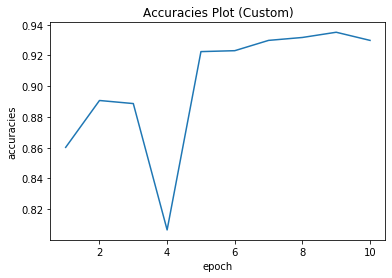

In [24]:
plt.plot(epoch, accuracies)
plt.xlabel('epoch')
plt.ylabel('accuracies')
plt.title('Accuracies Plot (Custom)')

Text(0.5, 1.0, 'Loss Plot (Custom)')

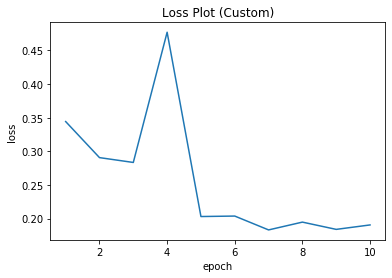

In [25]:
plt.plot(epoch, loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss Plot (Custom)')